# Guided Project: I-94 Interstate Highway Data Analysis

## Intro:

This guided project, is a practical appliaction of the explaratory data visualization aspect of a data analysis or data science project. Here we want to showcase vsiuals from the [I-94 Interstate Highway](https://en.wikipedia.org/wiki/Interstate_94).

**Dataset Info:** 
Hourly Interstate 94 Westbound traffic volume for MN DoT ATR station 301, roughly midway between Minneapolis and St Paul, MN. Hourly weather features and holidays included for impacts on traffic volume. Also, the station only records westbound traffic (cars moving from east to west). 

**_Note:_** This means that the results of our analysis will be about the westbound traffic in the proximity of that station. In other words, we should avoid generalizing our results for the entire I-94 highway.

**Attribute Information:**

1. `holiday Categorical` - US National holidays plus regional holiday, Minnesota State Fair 
2. `temp` - Numeric Average temp in kelvin 
3. `rain_1h` - Numeric Amount in mm of rain that occurred in the hour 
4. `snow_1h` - Numeric Amount in mm of snow that occurred in the hour 
5. `clouds_all` - Numeric Percentage of cloud cover 
6. `weather_main` - Categorical Short textual description of the current weather 
7. `weather_description` - Categorical Longer textual description of the current weather 
8. `date_time` - DateTime Hour of the data collected in local CST time 
9. `traffic_volume` - Numeric Hourly I-94 ATR 301 reported westbound traffic volume

## Goal:

The goal of our analysis is to determine a few indicators of heavy traffic on I-94. These indicators can be weather type, time of the day, time of the week, etc. For instance, we may find out that the traffic is usually heavier in the summer or when it snows.

## Findings:

1. Traffic volume is most high during business days (Monday to Friday).
2. On business days, traffic is the most high during early mornings (7am) and mid afternoons (post 4pm).
3. Traffic is usually heavier during warm months compared to cold months.
4. Ultimately, we can conclude that the presence of snow causes high volumes of traffic, as well as thunderstorms with drizzle.
5. Weather type as a vague description does not correlate to higher traffic volume.

### Part 1: First Looks at Data & Cleaning

In [1]:
# import necessary packages
import pandas as pd

i_94 = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')

In [2]:
i_94.head(5)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [3]:
i_94.tail(5)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [4]:
i_94.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

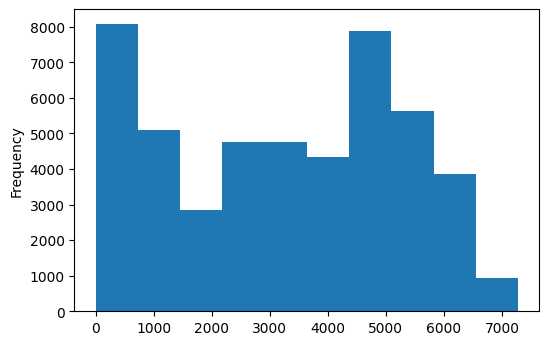

In [6]:
i_94['traffic_volume'].plot.hist()

In [7]:
i_94['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

The highest frequency of traffic volume occurs from `0-500` and `5000-5500`. Considering traffic volume is numeric hourly metric, the traffic time pattern is probably attributed to people commutting to work in the mornings and then people heading home in the evenings. (Mirroring typical 9-5 commute behavior).

About 25% of the time, there were 1,193 cars or fewer passing the station each hour — this probably occurs during the night, or when a road is under construction.

About 25% of the time, the traffic volume was four times as much (4,933 cars or more).

This possibility that nighttime and daytime might influence traffic volume gives our analysis an interesting direction: comparing daytime with nighttime data.

We'll start by dividing the dataset into two parts:

Daytime data: hours from 7 a.m. to 7 p.m. (12 hours)
 
Nighttime data: hours from 7 p.m. to 7 a.m. (12 hours)

In [8]:
#convert date_time 
i_94['date_time'] = pd.to_datetime(i_94['date_time'])

In [9]:
i_94['date_time'].dt.hour

0         9
1        10
2        11
3        12
4        13
         ..
48199    19
48200    20
48201    21
48202    22
48203    23
Name: date_time, Length: 48204, dtype: int64

In [10]:
daytime = i_94.copy()[(i_94['date_time'].dt.hour >= 7) & 
                   (i_94['date_time'].dt.hour < 19) ]
nighttime = i_94.copy()[(i_94['date_time'].dt.hour >= 19) | 
                     (i_94['date_time'].dt.hour < 7)]

(0.0, 7000.0)

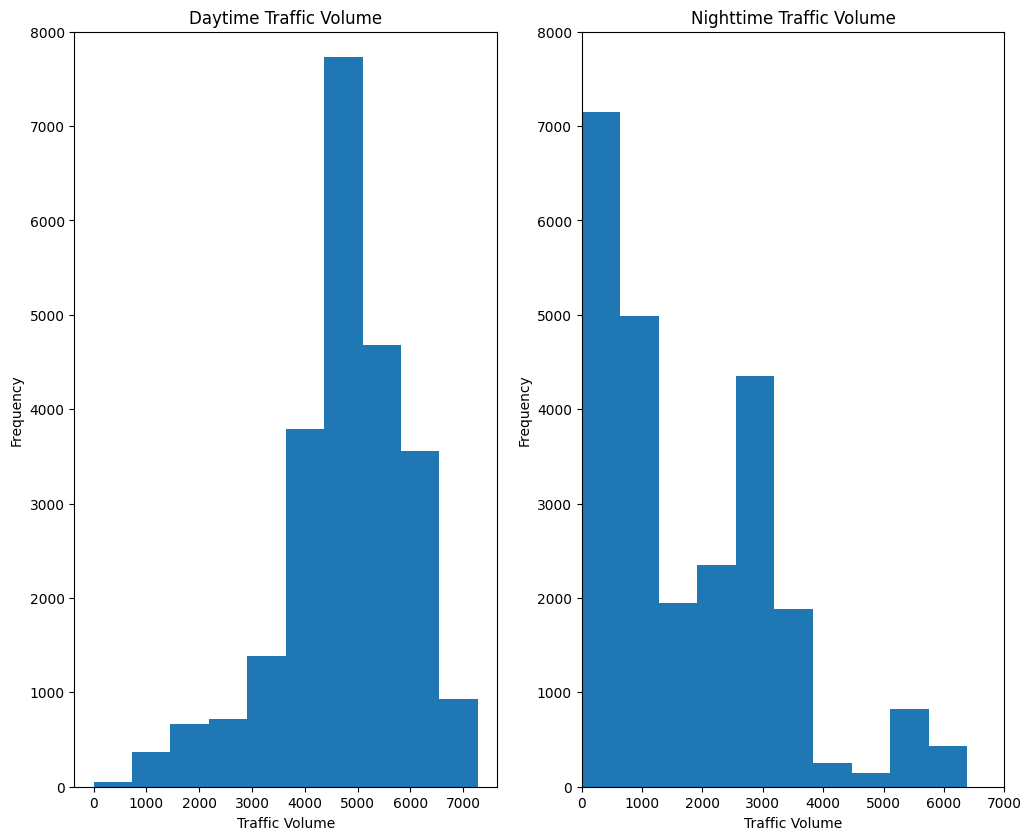

In [11]:
plt.figure(figsize=(12,10))
plt.subplot(1,2,1)
daytime['traffic_volume'].plot.hist()
plt.title('Daytime Traffic Volume')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
plt.ylim([0,8000])
# plt.xlim([0,7000])

plt.subplot(1,2,2)
nighttime['traffic_volume'].plot.hist()
plt.title('Nighttime Traffic Volume')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
plt.ylim([0,8000])
plt.xlim([0,7000])

In [12]:
daytime.describe()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
count,23877.000000,23877.00000,23877.000000,23877.000000,23877.000000
mean,282.257596,0.53306,0.000253,53.122000,4762.047452
std,13.298885,63.62932,0.008853,37.564588,1174.546482
min,0.000000,0.00000,0.000000,0.000000,0.000000
25%,272.680000,0.00000,0.000000,5.000000,4252.000000
50%,283.780000,0.00000,0.000000,75.000000,4820.000000
75%,293.440000,0.00000,0.000000,90.000000,5559.000000
max,310.070000,9831.30000,0.510000,100.000000,7280.000000


In [13]:
nighttime.describe()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
count,24327.000000,24327.000000,24327.000000,24327.000000,24327.000000
mean,280.173600,0.139145,0.000192,45.672011,1785.377441
std,13.296357,1.110872,0.007434,40.048382,1441.951197
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,271.700000,0.000000,0.000000,1.000000,530.000000
50%,281.379000,0.000000,0.000000,40.000000,1287.000000
75%,290.700000,0.000000,0.000000,90.000000,2819.000000
max,307.680000,55.630000,0.510000,100.000000,6386.000000


Daytime traffic volume histogram is right skewed. Indicating that higher volumes of traffic are experienced more during the day. With about ~4500 traffic volume being the most frequent during the day.

Nighttime traffic volume histogram is light skewed. Indicating that lower volumes of traffic are experienced during the night. 

Since our goal is to find indicators of heavy traffic , and traffic at nighttime is fairly night we should analyze only the daytime traffic dataset from here on.

### Part Two: What are Causes of Heavy Traffic During Daytime

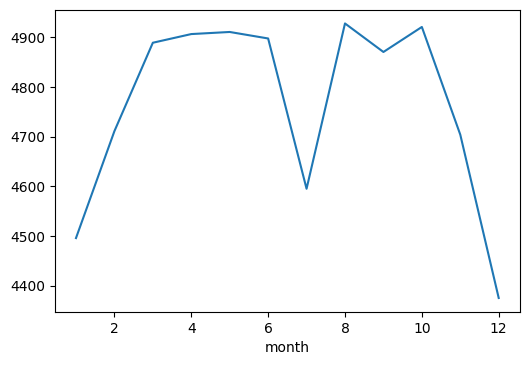

In [14]:
#lets see how traffic fairs month to month
daytime['month'] = daytime['date_time'].dt.month
by_month = daytime.groupby('month').mean()
by_month['traffic_volume'].plot()

Interesting occurence in the line chart above is that traffic is extremely low in July.

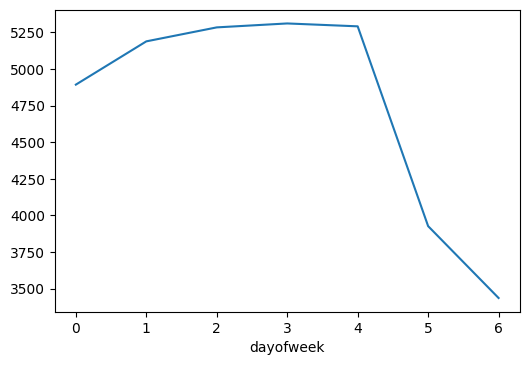

In [15]:
daytime['dayofweek'] = daytime['date_time'].dt.dayofweek
by_dayofweek = daytime.groupby('dayofweek').mean()
by_dayofweek['traffic_volume'].plot()  # 0 is Monday, 6 is Sunday

Traffic on weekends is extremely low compared to business days. This statement makes sense, people usually work 9-5 work schedules Monday through Friday and are off on weekends.

Considering business days vs weekends are very different in traffic volume, we will want to split the datasets so that the weekend average does not drop the overall average.

In [16]:
#splitting data business day vs weekend
daytime['hour'] = daytime['date_time'].dt.hour
bussiness_days = daytime.copy()[daytime['dayofweek'] <= 4] # 4 == Friday
weekend = daytime.copy()[daytime['dayofweek'] >= 5] # 5 == Saturday
by_hour_business = bussiness_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

# print(by_hour_business['traffic_volume'])
# print(by_hour_weekend['traffic_volume'])

Text(0, 0.5, 'Traffic Volume')

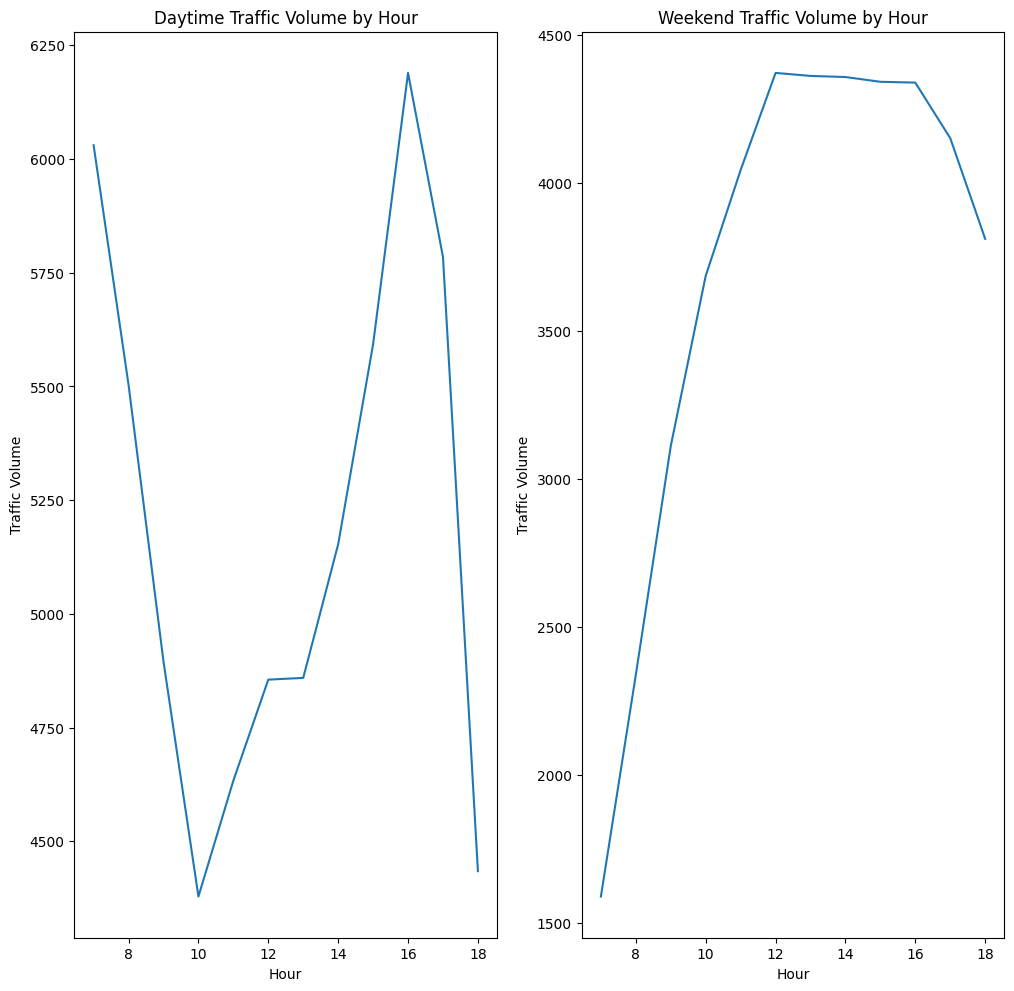

In [17]:
#lets visualize business day vs weekend traffic by hour

plt.figure(figsize=(12,12))
plt.subplot(1,2,1)
by_hour_business['traffic_volume'].plot()
plt.title('Daytime Traffic Volume by Hour')
plt.xlabel('Hour')
plt.ylabel('Traffic Volume')
plt.subplot(1,2,2)
by_hour_weekend['traffic_volume'].plot()
plt.title('Weekend Traffic Volume by Hour')
plt.xlabel('Hour')
plt.ylabel('Traffic Volume')

Business Day traffic takes a bimodial shape, we observe high traffic early in the morning up 10am then again midafternoon, with a peak at 4-5pm, then traffic trails off at night. 

On weekends we see traffic volume is low until the afternoon--peaks at 12pm and stays constant until about 6pm then trails off.

### Heavy Traffic Indicators by Time:

1. Traffic volume is most high during business days (Monday to Friday).
2. On business days, traffic is the most high during early mornings (7am) and mid afternoons (post 4pm).
3. Traffic is usually heavier during warm months compared to cold months.

### Part Three: Evaluating Correlation values between traffic volume and numerical weather variables

Another possible indicator of heavy traffic is weather. The dataset provides us with a few useful columns about weather: temp, rain_1h, snow_1h, clouds_all, weather_main, weather_description.

A few of these columns are numerical so let's start by looking up their correlation values with traffic_volume.

In [18]:
daytime.corr()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,month,dayofweek,hour
temp,1.000000,0.010815,-0.019286,-0.135519,0.128317,0.222072,0.000188,0.162691
rain_1h,0.010815,1.000000,-0.000091,0.004993,0.003697,0.001176,-0.009683,0.008279
snow_1h,-0.019286,-0.000091,1.000000,0.027721,0.001265,0.026768,-0.008814,0.003923
clouds_all,-0.135519,0.004993,0.027721,1.000000,-0.032932,0.000595,-0.041980,0.023685
traffic_volume,0.128317,0.003697,0.001265,-0.032932,1.000000,-0.022337,-0.416453,0.172704
month,0.222072,0.001176,0.026768,0.000595,-0.022337,1.000000,0.013656,0.008145
dayofweek,0.000188,-0.009683,-0.008814,-0.041980,-0.416453,0.013656,1.000000,-0.002767
hour,0.162691,0.008279,0.003923,0.023685,0.172704,0.008145,-0.002767,1.000000


Temperature has the highest correlation value with traffic_volume of the numerical weather columns.

(230.0, 320.0)

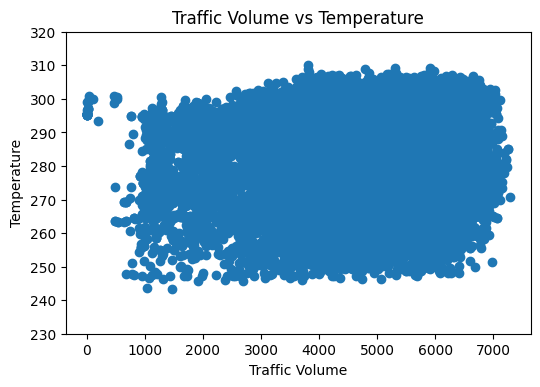

In [19]:
plt.scatter(x=daytime['traffic_volume'],y=daytime['temp'])
plt.xlabel('Traffic Volume')
plt.ylabel('Temperature')
plt.title('Traffic Volume vs Temperature')
plt.ylim(230, 320)

From the scatter plot above we can see there is realistically no correlation between temperature and traffic volume, even with traffic volume and temperature having the largest pearson correlation value. 

Overall the weather columns are not reliable indicators of heavy traffic.

### Part Four: Categorical Weather Related Variables and their relation with traffic volume

In [20]:
by_weather_main = daytime.groupby('weather_main').mean()
by_weather_description = daytime.groupby('weather_description').mean()

Text(0, 0.5, 'Weather Main Type')

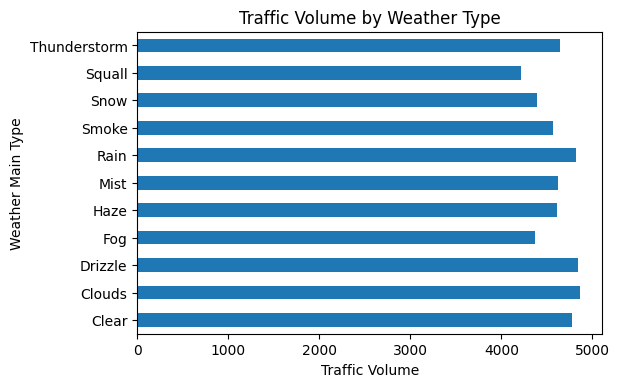

In [21]:
by_weather_main['traffic_volume'].plot.barh()
plt.title('Traffic Volume by Weather Type')
plt.xlabel('Traffic Volume')
plt.ylabel('Weather Main Type')

By Weather Main type no traffic volume exceeds 5000. From the bar chart, weather type is not a heavy traffic indicator

Text(0, 0.5, 'Weather Main Type')

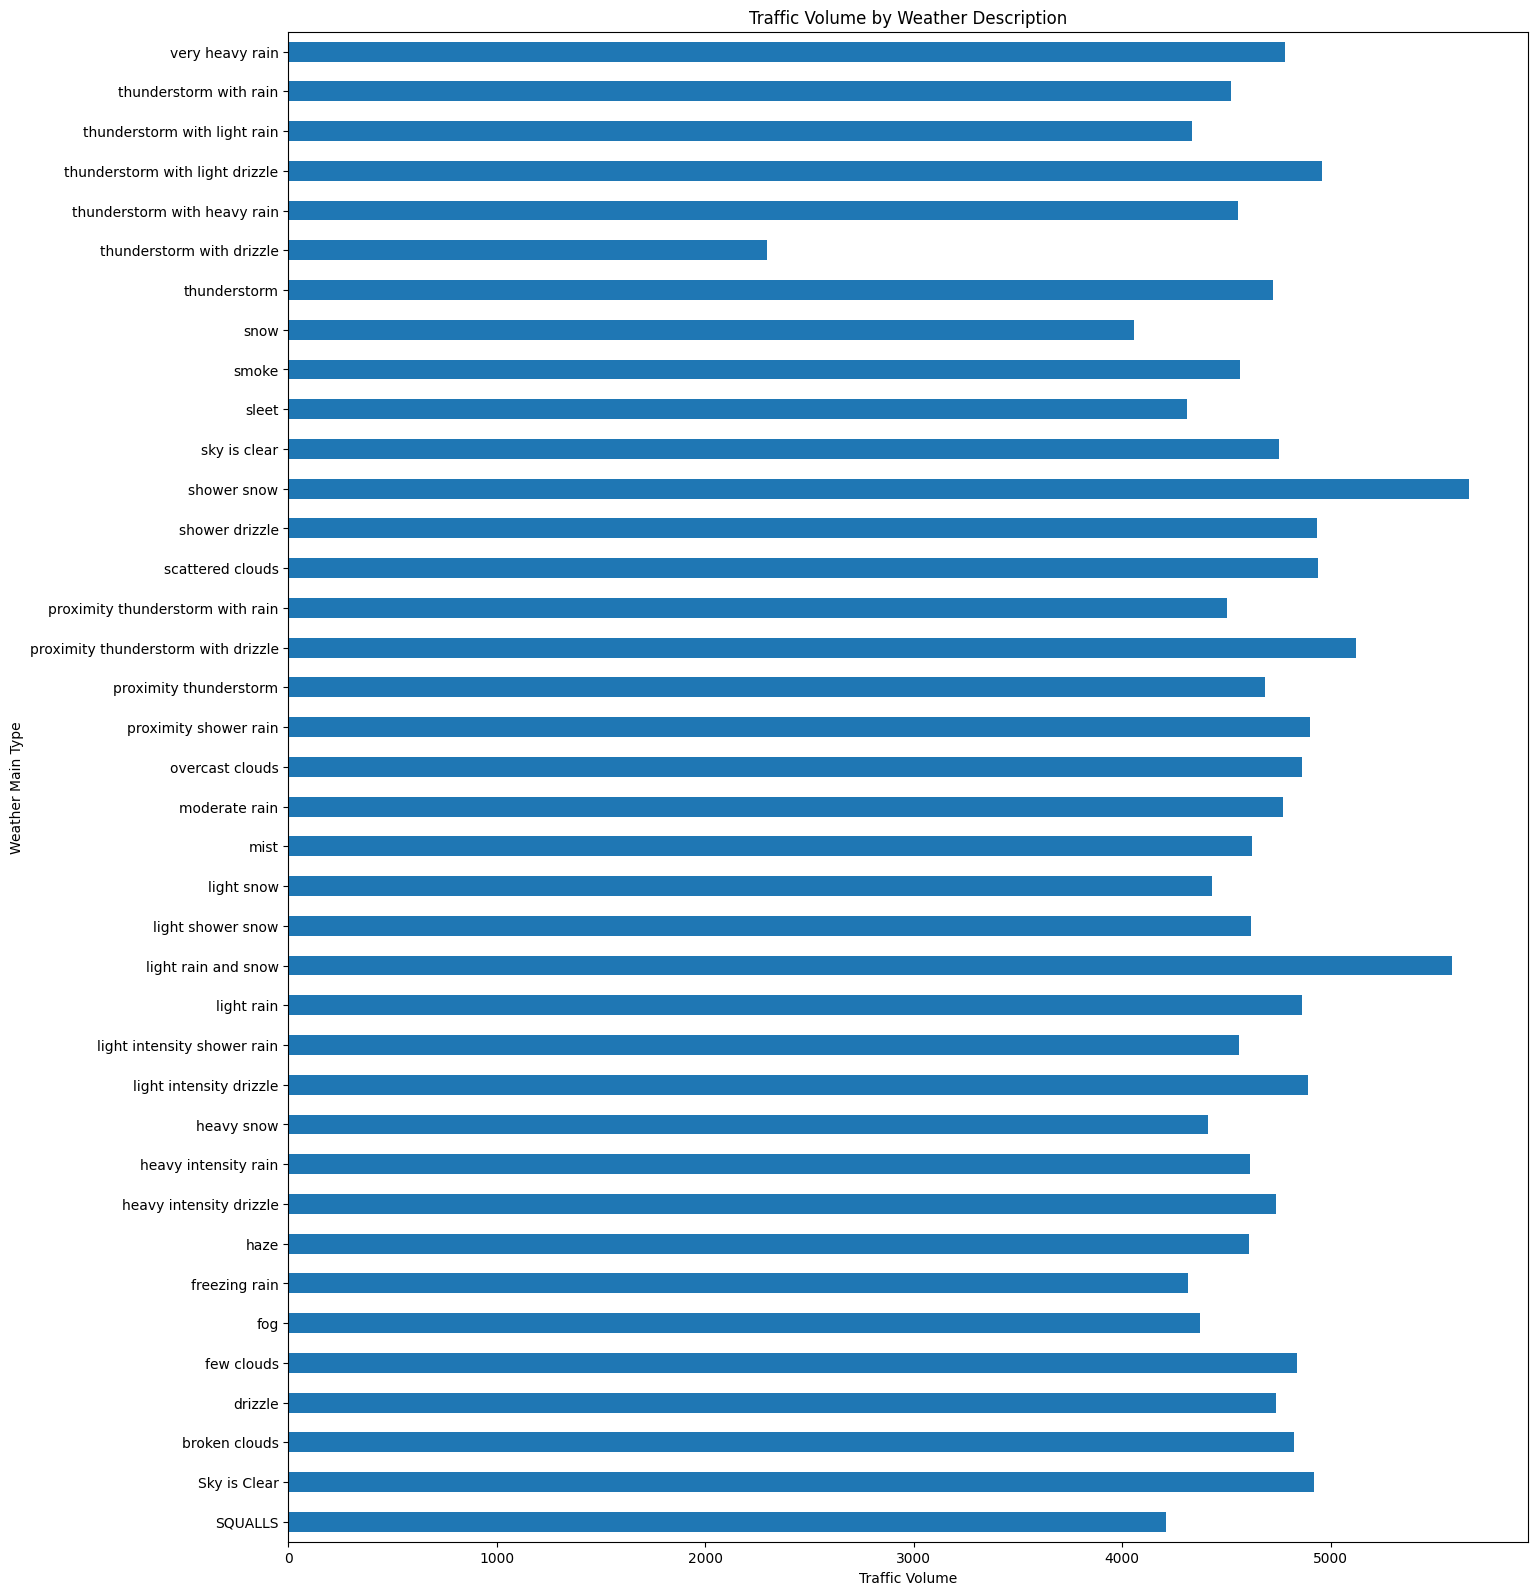

In [22]:
plt.figure(figsize=(16,20))
by_weather_description['traffic_volume'].plot.barh()
plt.title('Traffic Volume by Weather Description')
plt.xlabel('Traffic Volume')
plt.ylabel('Weather Main Type')

Traffic Volume exceeds 5,000 when weather is shower snow or when weather is light rain and snow, or proximity thunderstorm with drizzle. Ultimately, we can conclude that the presence of snow causes high volumes of traffic.

# Conclusion:

1. Traffic volume is most high during business days (Monday to Friday).
2. On business days, traffic is the most high during early mornings (7am) and mid afternoons (post 4pm).
3. Traffic is usually heavier during warm months compared to cold months.
4. Ultimately, we can conclude that the presence of snow causes high volumes of traffic, as well as thunderstorms with drizzle.
5. Weather type as a vague description does not correlate to higher traffic volume.

##### TODO:
1. Use the nighttime data to look for heavy traffic indicators.
2. Find more time and weather indicators.
3. Make your project portfolio-ready by following this style guide.